# 03. Классификация

Содержание:
- Постановка задачи классификации
    - бинарная классификация
    - мультиклассовая классификация
- Оценка качества классификатора
    - precision, recall, accuracy, f1
    - дисбаланс классов
- Методы классификации: Деревья решения
- Методы классификации: Метод $k$ ближайших соседей (kNN)
- Ссылки для дальнейшего изучения

# 1. Постановка задачи классификации

_Классификация_ $-$ это предсказание класса (метки) для объекта по его признакам.

> Примеры:
> - Спам/не спам в почте.
> - Болен/здоров по результатам медицинских анализов.
> - К какому виду относится цветок по фотографии.

Разновидности классификации по количеству классов:
- Бинарная классификация: 2 класса (например, `спам` vs `не спам`).
- Мультиклассовая классификация: 3 и более классов.

# 2. Оценка качества классификатора

Базовые понятия в случае бинарной классификации.
У нас два класса: 1 (или положительный класс) и 0 (или отрицательный класс). Тогда варианты для предсказания метки класса следующие:
- TP (True Positive) $-$ модель верно предсказала класс 1.
- TN (True Negative) $-$ модель верно предсказала класс 0.
- FP (False Positive) $-$ модель ошибочно предсказала класс 1 (ложная тревога, ошибка первого рода).
- FN (False Negative) $-$ модель ошибочно предсказала класс 0 (пропуск, ошибка второго рода).

![](https://www.tutorialspoint.com/assets/questions/media/661458-1692780414.png)

Метрики:
- Accuracy = $\frac{TP + TN}{TP + TN + FP + FN}$ $-$ доля верных среди всех предсказаний
- Precision = $\frac{TP}{TP + FP}$ $-$ доля верных среди предсказанных положительных
- Recall = $\frac{TP}{TP + FN}$ $-$ доля найденных среди всех истинно положительных
- F1 = $2\frac{Precision · Recall}{Precision + Recall}$ $-$ баланс Precision и Recall

### Проблема дисбаланса классов

_Дисбаланс_ классов возникает, когда в данных один класс представлен существенно больше, чем другой (например, 99% объектов одного класса и 1% — другого).

> Проблема:
> Модель, которая _всегда_ предсказывает большой класс, может иметь высокую Accuracy, но на практике она бесполезна,
> так как не умеет находить меньший класс (например, мошеннические операции или редкие заболевания).


Что делать?
- Использование подходящих метрик:
    - вместо Accuracy используйте Precision, Recall, F1-Score или ROC-AUC, которые менее чувствительны к дисбалансу.
- Взвешивание классов:
    - многие алгоритмы позволяют назначать больший "штраф" за ошибку на объектах меньшего класса.
- Сэмплирование:
    - "Недосэмплирование": случайное удаление части объектов большого класса
    - "Пересэмплирование": искусственное увеличение количества объектов миноритарного класса (например, дублирование или генерация синтетических примеров)

> **Важно!** Не всегда нужно бороться с дисбалансом. Если модель хорошо ранжирует объекты (то есть присваивает объектам меньшего класса более высокие вероятности), а вас интересуют именно вероятности, то дисбаланс может быть не страшен.

Далее рассмотрим методы классификации:
- Метод $k$ ближайших соседей (kNN)
- Деревья решения

# 3. Методы классификации: Метод $k$ ближайших соседей (kNN)

kNN (k-nearest neighbors) $-$ один из самых простых алгоритмов классификации.
Он относится к категории _ленивых алгоритмов_, поскольку в процессе обучения он просто запоминает все данные, а вычисления происходят только в момент классификации нового объекта.

Принцип работы:

1. Вычисляем расстояние от нового объекта до всех точек в обучающей выборке
2. Выбираем $k$ ближайших соседей
3. Назначаем новому объекту класс, который наиболее распространен среди этих $k$ соседей


![](https://vitalflux.com/wp-content/uploads/2020/09/Screenshot-2020-09-22-at-2.34.57-PM.png)

## Метрики расстояния

_Расстояние_ $-$ это численная мера того, насколько далеко друг от друга находятся два объекта в пространстве признаков.

Популярные метрики расстояния:

| Метрика | Формула | Особенности |
|---------|---------|-------------|
| евклидово (L2) | $d = \sqrt{\sum_i(x_i - y_i)^2}$ | Наиболее интуитивная, "прямое" расстояние |
| манхэттенское (L1) | $d = \sum_i |x_i - y_i|$ | Подходит для данных с большим количеством выбросов |
| косинусное | $d = 1 - \frac{xy}{|x| |y|}$ | Эффективно для текстовых данных, $xy$ $-$ скалярное произведение |
| Минковского | $d = (\sum_i |x_i - y_i|^p)^{\frac{1}{p}}$ | При $p=1$ получаем L1, при $p=2$ получаем L2 |

## Реализация

![](https://scikit-learn.org/stable/_static/scikit-learn-logo-small.png)


[scikit-learn](https://scikit-learn.org/stable/getting_started.html) $-$ библиотека машинного обучения для Python

- Scikit-learn (классификация): https://scikit-learn.org/stable/supervised_learning.html
- Примеры sklearn datasets: https://scikit-learn.org/stable/datasets/sample_generators.html


kNN:
- `from sklearn.neighbors import KNeighborsClassifier`

## Пример

[Датасет Ирисы Фишера](https://scikit-learn.org/1.4/auto_examples/datasets/plot_iris_dataset.html) состоит из данных о 150 экземплярах ириса,
по 50 экземпляров из трёх видов:
- Ирис щетинистый (Iris setosa),
- Ирис виргинский (Iris virginica) и
- Ирис разноцветный (Iris versicolor).

Для каждого экземпляра измерялись четыре характеристики (в сантиметрах):
- Длина наружной доли околоцветника (англ. sepal length);
- Ширина наружной доли околоцветника (англ. sepal width);
- Длина внутренней доли околоцветника (англ. petal length);
- Ширина внутренней доли околоцветника (англ. petal width).

На основании этого набора данных требуется построить правило классификации, определяющее вид растения по данным измерений. Это задача многоклассовой классификации, так как имеется три класса $-$ три вида ириса.

Один из классов (Iris setosa) линейно-разделим от двух остальных.

![](https://scikit-learn.org/1.4/_images/sphx_glr_plot_iris_dataset_001.png)

In [1]:
# Импорт библиотек
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Загрузка данных
iris = load_iris()
X = iris.data[:, :2]  # ВАЖНО! Далее используем только два признака (проще визуализировать)
y = iris.target

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Масштабирование данных

Представьте, что у вас есть данные:
- Возраст: от 0 до 100 лет
- Зарплата: от 30000 до 200000 рублей
- Рост: от 1.5 м до 2 м

Если подать эти числа "как есть" в алгоритм машинного обучения, он может неправильно интерпретировать важность признаков просто из-за разницы в масштабах.

Решение $-$ привести данные к единому масштабу.
В этом поможет
`StandardScaler` из `sklearn.preprocessing`

`StandardScaler` приводит все данные к единому масштабу по формуле:
```
новое_значение = (старое_значение - среднее) / стандартное_отклонение
```

После такого преобразования:
- Среднее значение каждого признака становится 0
- Стандартное отклонение становится 1
- Данные имеют одинаковый масштаб

In [2]:
# Стандартизация данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Разберем код построчно:

```python
scaler = StandardScaler()  # Создаем "нормализатор"
```

```python
X_train = scaler.fit_transform(X_train)
```
- `fit` - вычисляет среднее и стандартное отклонение для тренировочных данных
- `transform` - применяет преобразование к данным
- `fit_transform` - делает обе операции сразу

```python
X_test = scaler.transform(X_test)
```
- Только `transform` - применяет те же самые параметры (то же среднее и отклонение), которые были вычислены на тренировочных данных

#### Почему по-разному для train и test?

**Важный момент!** Мы должны преобразовывать тестовые данные используя параметры из тренировочных данных, а не вычислять новые параметры на тестовых данных.

Почему?
- В реальной жизни у нас не будет "будущих" данных для вычисления параметров
- Это предотвращает "утечку информации" из тестовой выборки
- Гарантирует, что модель работает в одинаковых условиях

In [3]:
# Создание и обучение модели
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Оценка точности
accuracy = knn.score(X_test, y_test)
print(f"Точность модели: {accuracy:.2f}")

Точность модели: 0.80


### Визуализация результатов

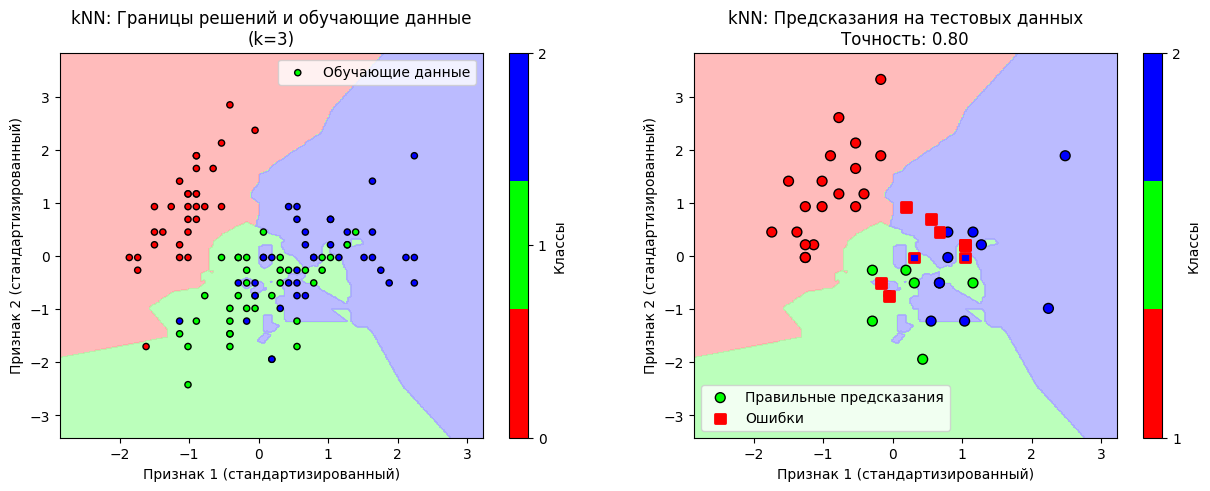

In [4]:
from matplotlib.colors import ListedColormap

# Создаем цветовую карту для классов
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Создаем сетку для построения границ решений
h = 0.02  # шаг сетки
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Предсказываем класс для каждой точки сетки
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Создаем график
plt.figure(figsize=(15, 5))


# 1. Визуализация обучающих данных и границ решений

plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold, 
            edgecolor='black', s=20, label='Обучающие данные')
plt.xlabel('Признак 1 (стандартизированный)')
plt.ylabel('Признак 2 (стандартизированный)')
plt.title('kNN: Границы решений и обучающие данные\n(k=3)')
plt.colorbar(ticks=[0, 1, 2], label='Классы')
plt.legend()


# 2. Визуализация тестовых данных и предсказаний

plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)

# Предсказания для тестовых данных
y_pred = knn.predict(X_test)

# Отмечаем правильные и неправильные предсказания
correct = y_pred == y_test
incorrect = ~correct

# Правильные предсказания
plt.scatter(X_test[correct, 0], X_test[correct, 1], c=y_test[correct], 
            cmap=cmap_bold, edgecolor='black', s=50, marker='o', 
            label='Правильные предсказания')

# Неправильные предсказания
plt.scatter(X_test[incorrect, 0], X_test[incorrect, 1], c=y_test[incorrect], 
            cmap=cmap_bold, edgecolor='red', s=50, marker='s', 
            linewidth=2, label='Ошибки')

plt.xlabel('Признак 1 (стандартизированный)')
plt.ylabel('Признак 2 (стандартизированный)')
plt.title(f'kNN: Предсказания на тестовых данных\nТочность: {accuracy:.2f}')
plt.colorbar(ticks=[0, 1, 2], label='Классы')
plt.legend()

### Матрица ошибок (confusion matrix)

<Figure size 600x500 with 0 Axes>

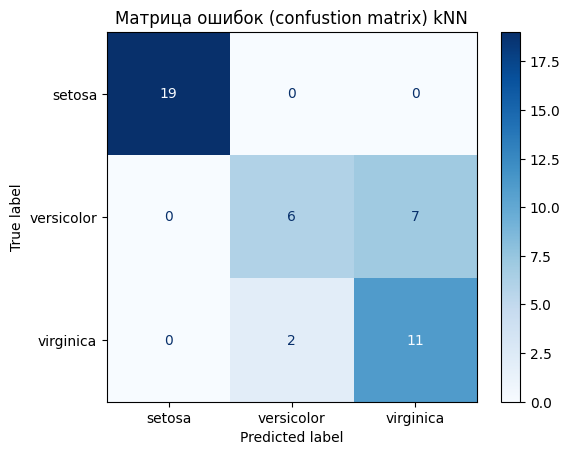

In [5]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap='Blues')
plt.title('Матрица ошибок (confustion matrix) kNN')
plt.show()

In [8]:
from sklearn.metrics import classification_report

print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.75      0.46      0.57        13
           2       0.61      0.85      0.71        13

    accuracy                           0.80        45
   macro avg       0.79      0.77      0.76        45
weighted avg       0.82      0.80      0.79        45



# 4. Методы классификации: Деревья решений

Алгоритм строит модель в виде древовидной структуры. Каждый внутренний узел дерева проверяет определенный признак, каждая ветвь $-$ результат проверки, а каждый лист $-$ метка класса.

![](https://www.insidealgorithms.com/wp-content/uploads/2024/05/decision-tree-featured_image-1024x576.png.webp)

Начиная с корня, дерево задает вопросы о признаках объекта. В зависимости от ответа объект спускается по соответствующей ветви до тех пор, пока не достигнет листа, который и укажет предсказанный класс.

Плюсы:
- Интерпретируемость

Минусы:
- Легко переобучается (нужны ограничения глубины, pruning)

## Пример

Попробуем классифицировать животных по двум признакам: "Имеет перья?" и "Умеет летать?".

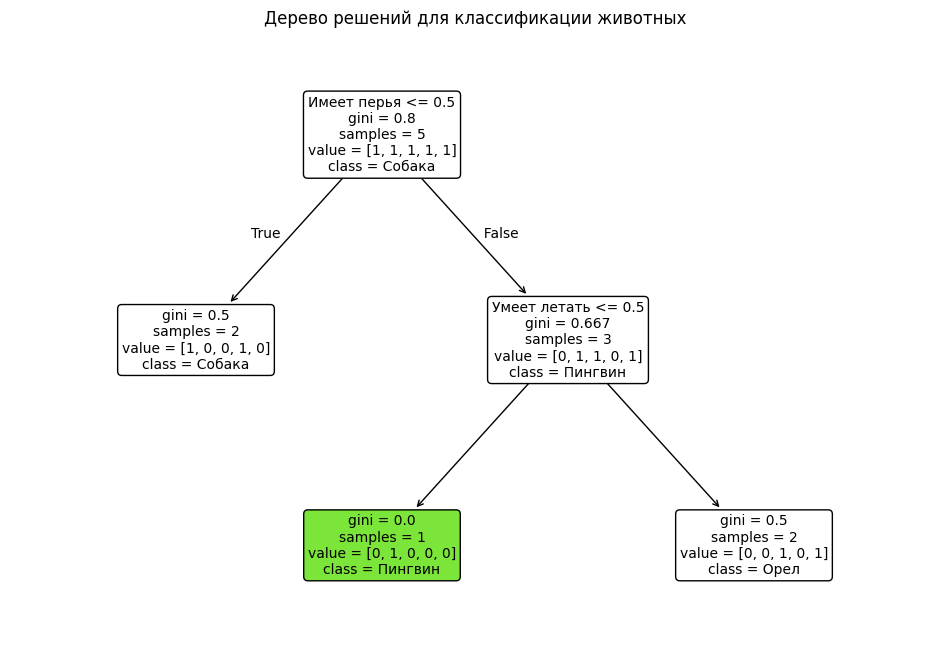

In [6]:
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt

# Данные: [Имеет_перья, Умеет_летать]
features = [[0, 0], [1, 0], [1, 1], [0, 0], [1, 1]] # 0 - Нет, 1 - Да
labels = ['Собака', 'Пингвин', 'Орел', 'Кот', 'Попугай'] # Метки классов

# Преобразуем в pd.Series перед факторизацией
label_series = pd.Series(labels)
label_ids, unique_labels = pd.factorize(label_series)

# Обучаем модель
clf = tree.DecisionTreeClassifier()
clf.fit(features, label_ids)

# Визуализируем дерево
plt.figure(figsize=(12, 8))
tree.plot_tree(clf,
               feature_names=['Имеет перья', 'Умеет летать'],
               class_names=unique_labels,
               filled=True,
               rounded=True,
               fontsize=10)
plt.title("Дерево решений для классификации животных")
plt.show()

gini (коэффициент Джини/примесь Джини) $-$ это критерий разделения в деревьях решений, который измеряет "нечистоту" или "неоднородность" узла
- gini = 0 $-$ идеально чистый узел (все объекты одного класса)
- gini = 0.5 (для бинарной классификации) $-$ максимально нечистый узел (равное распределение классов)

Чем меньше Gini, тем лучше разделение

# Ссылки для дальнейшего изучения

Документация и учебники:
- Матрица ошибок и метрики: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
- Метрики классификации (sklearn): https://scikit-learn.org/stable/modules/model_evaluation.html
- [scikit-learn / Nearest Neighbors](https://scikit-learn.org/stable/modules/neighbors.html) - документация по kNN
- [scikit-learn / Decision Trees](https://scikit-learn.org/stable/modules/tree.html) - документация по деревьям решений